# Assignment 2: Traffic Simulation
## Oscar Engelbrektson
## CS166, Prof. Scheffler, Spring 2020



# Simulating traffic on a cyclic road
The state of cellular automata is represented by a 1-dimensional array, the length of which represents the lenght of the road. The boundary condition is periodic, conceptually this means that we can think of the road as being a circle with cars going round and round. 

If there is not a car in a cell, the value of that cell is -1. Else, if there is a value in the range 0-max velocity (set to be 5 in both the Nagel and this paper) there is a car in the cell, with the value representing the speed of the car.

Running the cellular automata consists of two steps: (1) updating the velocities and (2) moving the cars.

1. The speed of each car is updated simulateously, given only the current state of all other cars. This means that cars do not take into account the current velocity of cars to estimate where they will be in the subsequent timestep (like a person is likely to do). There are 3 steps to updating the velocity of each car:
    1. If the car is travelling at less than max velocity, increase speed by 1.
    2. If the distance, defined as the number of empty cells between two cars plus 1, to the next car in front is smaller than or equal to the current velocity of the car, decrease the velocity to the distance-1.
    3. If the current speed is not 0, with some fixed probability (slowdown_proba), decrease the velocity by 1.
    
2. Each car is simultaneously advanced along the lane by the same number of cells as its velocity. E.g. if velocity is 2, move the car 2 cells forward.

By simultaneously, we mean that the first step is performed for every car before the second step is performed for any car. That is, all velocities are updated before any car is moved.

## Extending the model to multiple lanes
In the multiple lane model, the cellular automata is represented by a mxn array where m denotes the number of lanes and n the length of the road. In the edge case, a single lane road can be thought of a 1xn array.

To extend the model to multiple lanes, we now add a third step to running the cellular automata: updating the lanes of cars. This step will be performed before updating the velocities of cars and before moving them. Once it is completed, running the multiple lane cellular automata is equivalent to running several instances of the single-lane cellular automata defined previously. That is, for each lane, we perform simultaneous updates of velocity, then simultanous moving of the car. This means we only need to add a method for updating lanes.

If a car cannot accelerate––or in the case that it is already travelling at max velocity, maintain max velocity––in its current lane, it will see if it can in one of the adjacent lanes. That is, if the car can 1) accelerate––or in the case that it is already travelling at max velocity, maintain max velocity–– and 2) fit without obstructing the car behind it in the new lane, it will swap with probility p_change. Specifically, we define a car to "fit" in a new lane if the distance to the next car behind it in the new lane is greater than 5. This definition is motivated by the assumption that cars are unable to infer the speed at which other cars are travelling. Consequently, the distance must be at least 5 to ensure that the car will not be hit by the one behind it, even if it is travelling at max velocity.

It turns out, however, that the authors of the original paper I am tasked to replicate sprinkled in some additional conservatism and caution into these update rules. Namely, it is not sufficient that the distance to the next car ahead be large enough for one to accelerate. To change, it must be equal to that **plus 2**, as the number of empty cells to the car before the car in front (equal to distance-1) must be at least one greater than the current velocity––even if current velocity is the max velocity. Furthermore, the distance to the next car behind must so large that it cannot hit you even if it is travelling at the maximum velocity a car can travel, **plus 1!** Admittedly, I find these tweaks to the logic outlined above to make little sense (as even in the original formulation they seem overly conservative), it is these rules that will be applied in the simulations.

Thus, the procedure for the multilane model can be summarized as follows:

1. Update Lanes 
2. Update Velocity
3. Move

# Implementing the Model

## Model Parameters
* road_length. The number of cells per lane. In our simulations this number is set to 100.
* n_lanes. The number of lanes on the road. We study how the flow of traffic at different densities is affected by the number of lanes on the road.
* traffic_density. The proportion of cells in the road that are occupied by cars. E.g. if there are 20 cars in a road with length 100 and two lanes, the traffic density is 20/(2 * 100) = 0.1.
* max_velocity. The maximum speed that cars can travel. In our simulations this is 5, meaning that a car can at most be advanced by 5 cells in one time step.
* slowdown_proba. Determines the probability with which a car will decrease its velocity by 1, given that it is not already has speed 0.
* p_swap_lane. The probability that a car will perform the lane swap, given that the conditions for swithcing lanes are met. In out simulations, this is set to 1. That is, if the conditions are met, the cars always perform the swap.

## Methods
Note: All code can be found in the code appendix.
The model is implemented in one class: TrafficSimulation. The class consists of the following functions:

### Three main functions given by the 3 steps of running the cellular automata defined above:

    update_lanes(self):
        '''   
        Updates the lane of each of the cars on the road,
        Starting from the top lane and working downwards.
        Stores all updates on a copy of the road, then updates all synchronously.
        
        Swaps the lane of the car iff the following 4 conditions are met:
        
        
        1. The distance to the next car in front -1 < velocity of car +1.
        
        Conditions 2, 3, and 4 checked using check_lane(self, lane, cell, velocity):
        if in new lan car can:
            2) Accelerate
            3) Fit without obstructing car behind it
            4) Random draw from uniform distrubution on 0,1 < p_change
        
        Note: Does nothing if n_lanes = 1 as there are no lanes to switch to
        '''
        
    update_velocities(self):
        '''
        Updates velocity of each of the cars on the road. The following 3 steps are performed
        for each car:
        
        1. If the car is travelling at less than max velocity, increase speed by 1.
        
        2. If the distance, defined as the number of empty cells between two cars plus 1, 
        to the next car in front is smaller than or equal to the current velocity of the car, 
        decrease the velocity to the distance-1.
        
        3. If the current speed is not 0, with some fixed probability (slowdown_proba), 
        decrease the velocity by 1.
        '''
        
    step(self, track=False):
        '''
        Advances each car along its lane by its velocity.
        
        Stores all updates on a copy of the road, then updates all synchronously.
        
        If track=True, every run increments self.time by 1 
        and whenever a car passes the periodic boundary, self.flow is incremented by 1
        '''
        
        
### Supporting functions used in the primary functions:

    look(self, lane, cell, ahead=True):
        '''
        Takes a current position, defined using lane and cell
        Returns distance to next car in direction ahead
        if ahead=False, returns distance to next car behind

        Distance is defined to be 0 if there is a car in same cell in other lane
        '''
        
    check_lane(self, lane, cell, velocity):
        '''
        Checks if car, if moved to road[lane, position] can:
        1) Accelerate
        2) Fit without obstructing car behind it
        3) Random draw from uniform distrubution on 0,1 < p_change
        
        Returns True iff all these conditions are met
        '''
### Visualization:

    display(self):
        '''
        Shows a heatmap displaying the state of each cell on the road
        
        There are 5 possible states in the standard version of the simulation:
        White = -1, no car
        Red = Car w. velocity 0
        Orange = Car w. velocity 1
        Yellow = Car w. velocity 2
        Light Green = Car w. velocity 3
        Green = Car w. velocity 4
        Dark Green = Car w. velocity 5
        
        In general (for other v_max), the scale goes from red to green, with greener being faster.
        '''
        
### Run procedure

    run(self, steps, warmup=0, display=False, track=True):
        '''
        Runs warmup laps without visualizing the results to get cars up to speed

        Then runs steps more iterations of the simulation.
        If display is True, then the state of the simulation is visualized at each post-warmup step
        If track is True, then the time and flow at each post-warmup step is recorded
        '''
            
## Auxilliary Data Collection and Plotting functions
These functions are not part of the TrafficSimulation(object) itself, but are used to collect data to generate the plots in the next section.

    get_flow_data(simulations_per_density, steps_per_road, n_lanes=1):
        '''
        Makes simulations_per_density roads for each density 0.01 increment in the range 0.01 to 0.79,
        For each of these simulations, the road is run for 200 warmup steps.
        The flow/lane/timestep is then recorded for steps_per_road
        Note: n_lanes determines the number of lanes of the road. Constant for every simulation.

        Returns:

        flow_rate_list: format [[],[]] with densities in first list and flow/lane/timestep in second
        simulations_per_density entries are made in each list for for each density. 
        Used to generate scatter plot.

        mean_flow: format [] with the average flow/lane/timestep 
        across the simulations_per_density for each density

        lower_bound: format [] with the 2.5 percentile flow/lane/timestep 
        across the simulations_per_density for each density

        upper_bound = [] with the 97.5 percentile flow/lane/timestep 
        across the simulations_per_density for each density
        '''
        
        
    plot_flow(flow_rate_list, mean_flow, upper_bound, lower_bound, density_list, n_lanes):
        '''
        Generates one plot from the given data. 
        The plot contains:

        flow_rate_list: used to make scatter plot, with point given by each (flow, density) pair

        mean_flow: line plot with thick blue line, showing the average flow for each density

        upper_bound, lower_bound: used to create high-alpha fill between upper_bound and lower_bound for each
        density. This serves to visualize the 95% confidence interval of the flow for each density.
        '''
      

# Studying traffic behavior of the simulations on 1 lane and 2 lane roads

## Visualizing the state of the models over time without random slowdown

### State of the 1 lane model
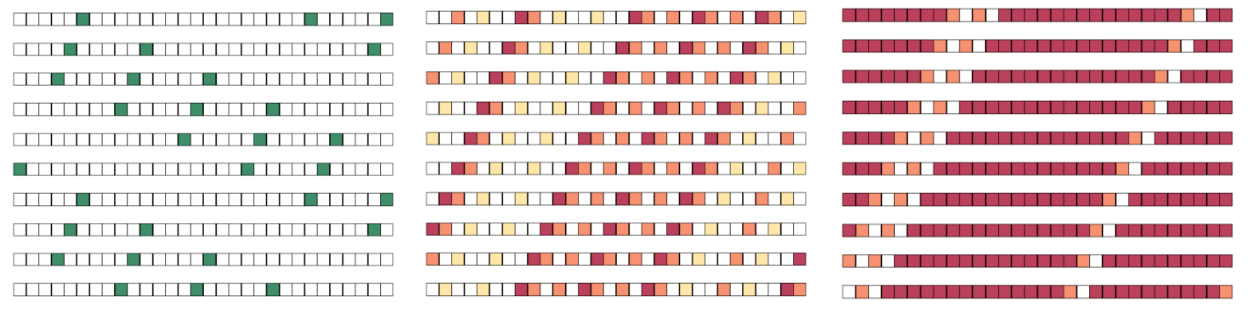
Fig 1. Visualizations of the state of the 1-lane road with no random slowdowns over time for 3 different densities, 0.1 (left), 0.5 (middle), and 0.9 (right). Each of the panels displays the state of the road across 10 consecutive steps of the simulation, after 100 warmup steps. That is, each panel displays the 101-111th states of a road with the corresponding density. 

The plots were generated using the TrafficSimulation.display() function, the color key is included in its description just above. In summary, white means no car; for cars the scale goes from red to green, with greener being faster.

### State of the 2 lane model
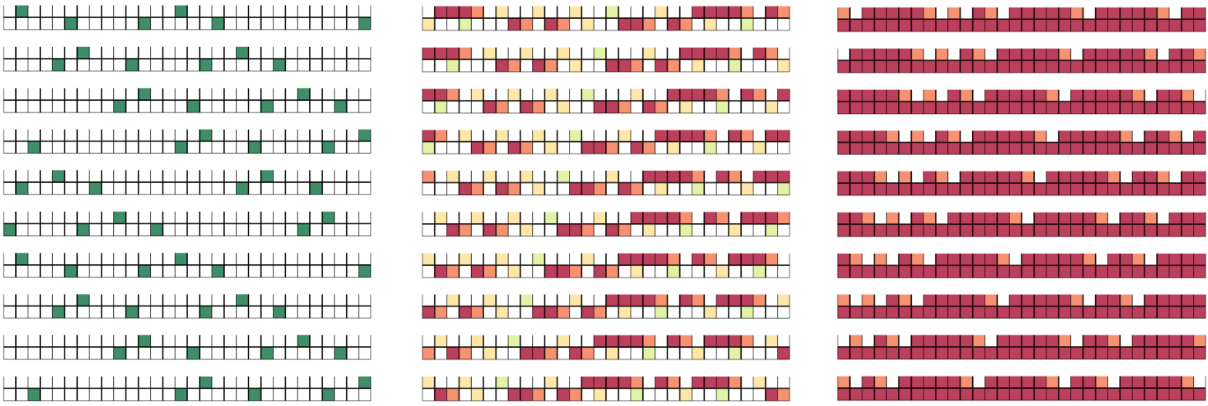
Fig 2. Same as Fig 1. but with a 2-lane, instead of a 1-lane, road.

### Analyzing the visualizations
The number of white cells is the same in all runs of a given simulation and specified by the density. We see that in the low density plots (left) the cars are travelling at maximum speed. Further, the cars are distributed such that there is no traffic, and each can move without inhibition. In the mid-density plot, there is a much wider range of velocities represented on the road–everything except 5. In the high density plot, there almost all cars are standing still as there are cars in the cell directly ahead of them. This is necessarily the case as the 0.9 density stipulates that only 1/10th of spaces are not occupied by cars. Thus, at most 1/10 cars–each with one empty cell in front of them– can advance each timestep.

The primary characterstic that I would like to highlight with this sequence of plots, free of random slowdowns, is the development of a "steady-state" of traffic. Across all of the densities, each state is just a horizontally shifted version of the previous state, accounting for the periodic boundary. That is, if we the configuration of cars does not change. This can most easily be seen by focusing on the empty cells in the high density simulations and the cars in the low density simulations. For example, you can see that the empty spaces are "shifted backwards" by 1 step in each timestep in the high-density model. This is because, at each iteration, as the car behind the empty space moves to fill it, an empty space is created where the car used to be. Similarly, in the low density simulation, the pattern is "shifted forward" by 5 spaces as each car advances by the maximum velocity at each iteration. The same type of shifting can be seen in the mid-density plots as well, allthough the balance of empty and occupied spaces makes the configuration appear more complex and thus harder to "shift" mentally.

## Visualizing the state of the models over time WITH random slowdown

### State of the 1 lane model
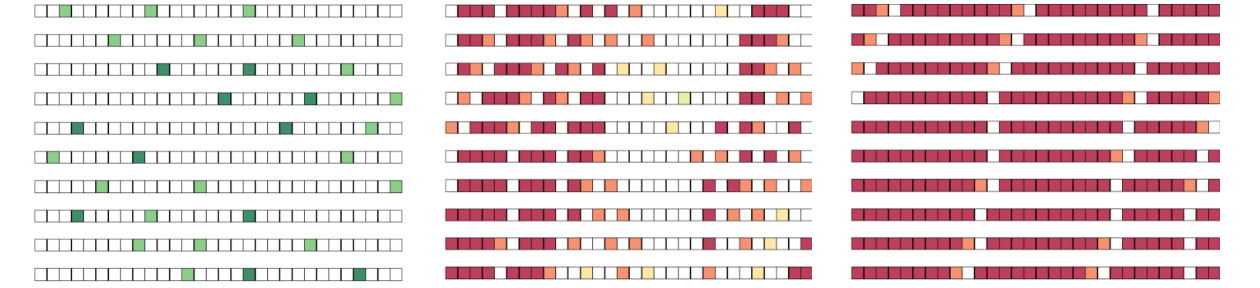
Fig 4.  Same as Fig 1. but WITH random slowdown probability of 0.5 (the way the model is mean to be run, and is run in subsequent sections).

### State of the 2 lane model
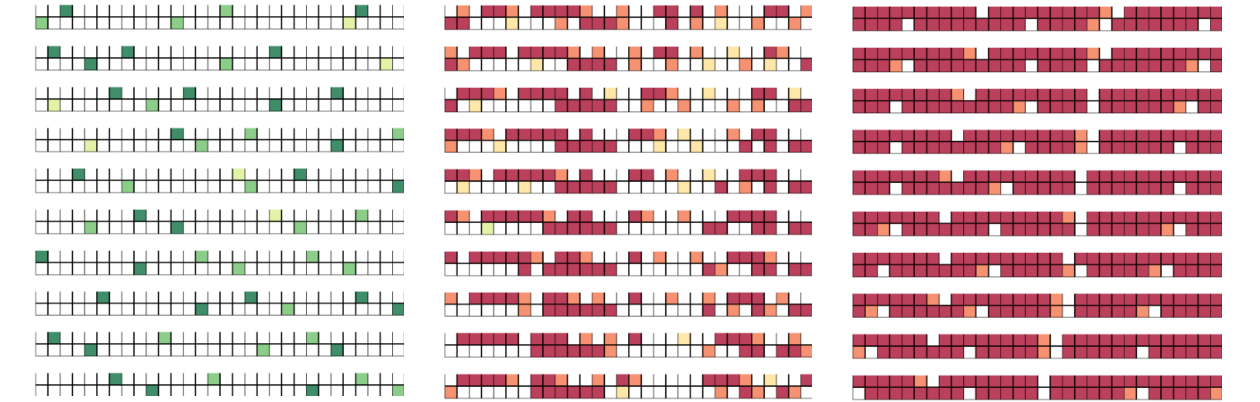
Fig 5. Same as Fig 4. but with a 2-lane, instead of a 1-lane, road.

Overall, we see that the state changes with the random slowdown probability 0.5 are substantially similar. Three differences worth noting. Secondly, the flow of traffic is now worse. Firsty, and perhaps unsurprisingly, the flow of traffic is now worse at every density: the all the shades of green are now represented in the low density plots, as opposed to only dark green; there are much more stationary cars in the mid-density and high plots. Secondly, the systems never reach "steady state" the random slowdown introduces random variability into the system at each timestep. That is, the next state is no longer a simple shift of the previous state. However, it is often close thereto and I think it serves as a good guide for reasoning about the behavior of the system (if the system was not visualized without random slowdowns, this would be hard to see). Thirdly, allthough it is not conveyed in figure 4 or 5, the variability in traffic flow decreases increases. In particular, traffic jams can now occur at lower densities.

## Comparing traffic flow
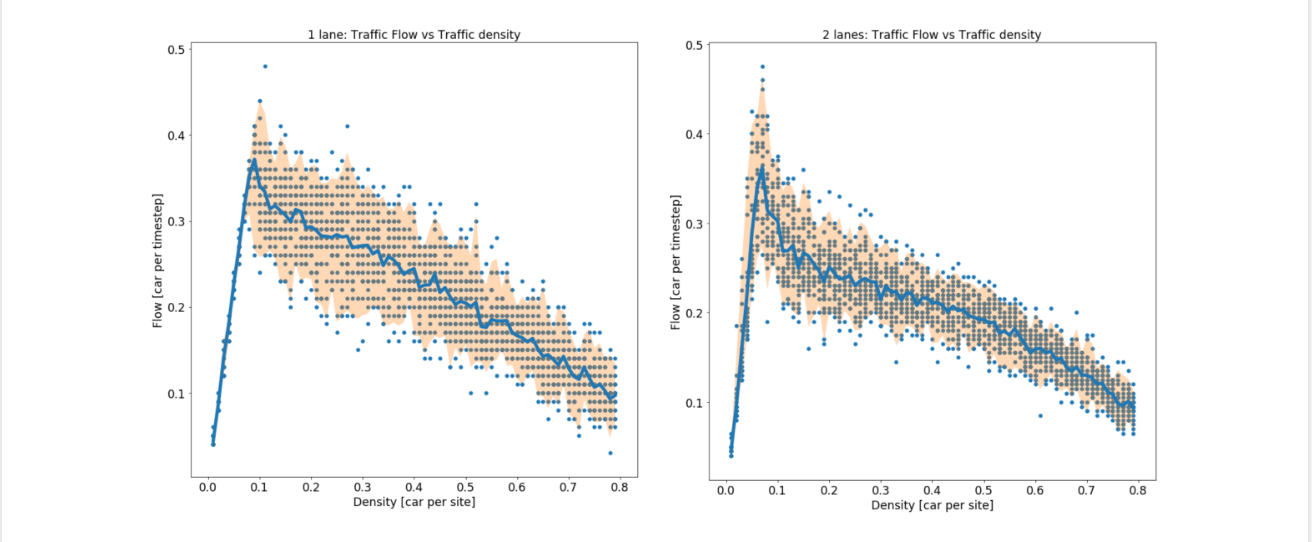

### Analyzing the flow of the models
Traffic flow is defined as the average number of cars passing a specific cell border on the road per timestep. In our case the end of the road, the border between the 100th and 1st cells (however, the results are invariant with respect to the choice of cell border).

The average traffic flow for each density was generated by initializing a random car configurations with the correct density. All cars are initialized with velocity 0. The simulation is then run for 100 steps without recording any results. This is to let the simulation "warm up" and let the cars get up to speed–the intial road filled with cars that aren't moving is not representative of how traffic actually behaves. The number of cars passing the cell border is then recorded for each of the subsequent 100 time steps and then divided by the number of lanes on the road. This entire procedure is repeated 25 times for each density. The average traffic flow per lane for each density, then, is computed by averaging the flow across the 100 * 25 = 2500 time steps. We repeat this process for every 1% increment in density between 1% and 80%.

Analyzing the plot, we see a rapid, approximately linear increase in the flow as density increases in the range 0.01 to ~0.1, up to a maximum flow per timestep per lane of about 0.4. This is followed by a gradual, approximately linear decrease in the range ~0.1 to 0.8. The plot has been truncated at 0.8, but the flow continues to decrease until it reaches 0 as density becomes 1, leaving no room for cars to move. Conceptually, this pattern can be understood as a the result of a trade-off between the number of cars and the speed of cars. When there are few cars on the road, the cars can travel at maximum velocity as there is no car ahead to slow it down. Up to a certain point–judging empirically this point seems to be approximately 0.1–more cars can be added to the road without causing any traffic, allowing all previous cars and the new car to travel at maximum velocity. That is, there is enough space for there to be atleast a gap of 5 between all cars. This means that there is no cost to adding a new car and flow is unequivocally increased. However, after this point, adding a new car to the road necessarily forces some other car(s) to slow down. Traffic is created, resulting in decreased flow. This falloff, however, is mitigated by the fact that as there are more cars on the road, the number of cells between the any given cell-border, including the periodic boundary, and the car closest to it becomes smaller. Thus, the speed necessary for the next car to reach the boundary in the current timestep is lower. Yet, in the final analysis the negative impact on speed outweighs the decreasing need for speed and net traffic flow is decreased.

The same general pattern holds true for the 2-lane simulation. Indeed, also for the 3-lane simulation which is substantially similar to the 2-lane simulation (see appendix). However, something goes wrong in my update_lanes function and, for the life of my, I don't know why. I do know, however, that it does sometimes result in cars being taken out of the simulation, such that the number of cars on the road is smaller than it was before the update_lanes() is called. I know the problem is in the update_lanes() function because a) I never loose any cars in the 1 lane model where there is no lane switching and 2) I tend to only lose cars when the density in in the range 0.1-0.3, which is when lane swapping is most likely to happen. This is because when the density is lower, it is unlikely that there will be a need/desire of drivers to switch lane, and when the density becomes higher switching is less likely not because drivers don't want to but because there is no space in the adjacent lanes. I believe this to result in a slightly lower than expected flow in the 0.1 to 0.3 density range. Because of this coding failure, I have elected not to display the flow of both models on the same plot because allthough it would make detailed comparison easier, a detailed comparison of the lines would likely be misleading (we cannot be certain how exactly the multi-lane models were affected, although I exmplain how I think they were affected below).

Absent my coding screw-up, I would believe the flow per lane of the 2 lane model would be close to identical to that of the 1 lane road. With perhaps a slight edge in the 0.1 to 0.3 range, where the possibility of switching–which is only done if advantageous to the drivers–can occor most freely. In fact, I believe that under the current set of rules in our model, there should be linear returns in flow to the number of lanes which, as we are dividing by the number of lanes, means that the flow per lane is the same regardless of the number of lanes. The reason I believe this to be the case is that after the warm-up period, the behavior of an n-lane simulation approaches that of n 1-lane simulations in the no random slowdown simulations.

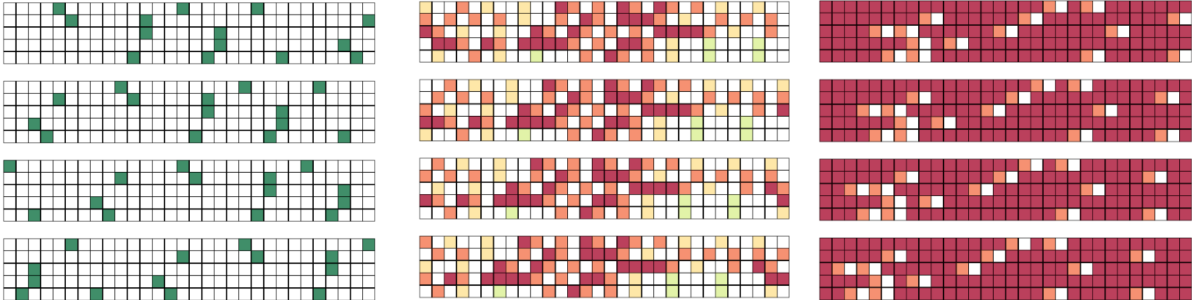
Fig 4. same as Fig 1. but for a 10 lane road and only 4 timesteps. The point of this visualization is to show that the steady-state configuration is reached regardless of the number of lanes, if there is no random slowdown. As in the previous set of state visualizations, the low density states are equal to the previous state shifted 5 cells (max velocity) to the right; the high density states are equal to the previous state with the gap shifted one cell backwards. The logic behind those patterns is the same as for the 1 and 2 lane model (see previous section) 

The observation that road simulation reach some sort of steady state, where the the same configuration of cars that is just shifted along the road at each step, also implies that there are no lane changes (otherwise the pattern would break). Further, as noted in the model introducton, the velocity update and moving steps of the simulation are identical in the 1-lane and multi-lane roads–the only difference is the addition of a lane update at the beginning of each timestep. Consequently, if no cars change lane, the n-lane roads are equivalent to n 1-lane roads. As the flow is computed on a per lane basis, this means that the flow visualizations should be identical in expectation if the warm-up is sufficiently long.

This is true up to the variability introduced by the random placement of cars on the road. It is possible that for certain initialization at certain densities, cars could become "trapped", such that they cannot switch, in unfavourable (or favourable) configurations. For example, the average flow per lane might be different in two n-lane roads if all the empty cells are in 1 of n lane. That is, they be forced to converge to two different states with different flows– in a way that cannot happen in the 1-lane model.

Furthermore, the random slowdown of cars prevents this steady state from developing/stabilizing completely. It does seem, however, that the deviations of flow from the steady state are approximately random. Theoretically, there should be some benefit to having the *alternative* to switch lanes, as the alternative is only used when it is beneficial to a driver. This interpretation is supported by the observation that the confidence intervals for the higher-lane models are smaller, which could be explained by the possibility of swapping lanes mitigating the effects on traffic of random slowdowns. A competing explanation, which definitely is playing a role (probably a larger one), is the fact that the effective sample size increases with the number of lanes. That is, because I each simulation the same number of initializations and for the same number of timesteps regardless of the number of lanes in the simulations, the number of cars on the road and thus with a chance to passing the periodic boundary, are proportionally larger. As higher number of sample decreases the variability of percentile metrics like the mean and the confidence interval, we should expect to see proportionally smaller confidence intervals.

However, as noted previously, it does seem that the sweetspot density in which lane switching is both desired and possible seems deceptively rare, lending more weight to the second explanation.

Thus there are currently approximately linear returns to adding lanes. That is, for every lane that we add, we can increase the number of additional cars that can be transported increases. However, this is unlikely to be true in reality, due to on- and off-ramps, as they force any car, independent of current lane, to travel into one of the outermost lanes to take the exit (or enter). Consequently, we would expect a marked increase in traffic jams caused by cars attempting to switch lanes to make the exit. We should thus not let ourselves be drawn to making faulty inferences about road policy based on our simulation results: this goes to the importance of understanding the real-world applicability of ones model–and their limitations!


# Assumptions of the model: is it suitable for predicting traffic in Buenos Aires?

All cars are the same. In our simulation, the car fleet on the road is homogenous. In reality, some cars are faster than others. This may play an important role on roads with a high speed limit, like highways, it is unlikely to affect traffic in a city like Buenos Aires, where the speed limits are invariably low. That is, in cities, drivers are constrained by the permissible speed more so than the performance capabilities of their cars.

All drivers behave the same. In our simulation, the drivers on the road are homogenous. They change lanes under the same conditions, they speed up the same way, they all slowdown with the same probability, and so on. This most definitely not true in Buenos Aires, or any other city for that matter.

The road is assumed to be homogenous. The road of this simulation is equally wide at all points, the speed limit is the same everywhere and there are no traffic lights or intersections. None of this is likely to hold true for a real world traffic system such as Buenos Aires.

The road is a closed system. Because the road is a circle cars never leave or enter, the density remains fixed for the duration of the simulation. In the Buenos Aires, 

Drivers disregard the velocity of other cars when making decisions. In our model, drivers consider only the position of others cars at the current time steps when making lane switching and velocity changes. In the real world, people are likely to also consider the speed of other cars. Whilst it might be true that in the face of uncertainty about the speed and trajectory of other cars, drivers tend to err on the side of caution, it seems highly unlikely that drivers are unable to infer the speed at which cars are moving. This becomes particularly apparent when we consider the fact that the real world is continous, cars are moving constantly. There is no move,freeze,evaluate,update,move-cycle. It seems to me people are more likely to consider some other heuristic like maintaining a minimum distance to the car ahead.

Drivers break as much as necessary but speed up only gradually. As opposed to speeding uo. Realistically, people are likely to speed up quickly to reach the speed limit or the car ahead of them in a few seconds - roughly the same amount of time required to break to avoid crashing into cars ahead of them.

It is clear that there are many assumptions made in the model that do not seem to hold true in Buenos Aires (BA). However, it is inherent in the modelling endeavor that simplifying assumptions must be made. After all, we are not trying to replicate the system itself, merely the necessary conditions to simulate some aspect of it behavior. Thus, the question of whether this simulation is suitable for predicting traffic in Buenos Aires is empirical. That is, does the traffic behavior exhibited by the simulations accurately mirror that of Buenos Aires? Consequently, the quality of the assumptions made in this model should not be evaluated on whether they hold true in reality. Perhaps some aspects of traffic behavior, like the lane swapping behavior of cars in a straight stretch of road, are captured, whilst others, like mean flow as a function of density, are not captured. To answer this, we would need to study the traffic behavior on BA roads and then compare it to that of the simulation. If accurate, we could, for example, use it to predict the behavior on road segments in BA where data has not been collected.

That said, I suspect that the omission of intersections and multiple roads from the model makes it ill-suited for simulating BA traffic–a dense city with intersections every 100 meters or so. I think stop lights are the main cause of stopping/jams, and that lane swapping is primarly motivated by the desire to navigate ones car so that one can turn onto another road.


# Future Work
The goal for future work then, would necessitate two-pronged efforts. Firstly, modelling a section of the Buenos Aires traffic system–a block or two by the Residence Hall, perhaps–using a model. This would require modifying the model to deal with more sophisticated scenarios–intersections, red lights and so on. Secondly, we would want to collect data on the traffic movements in the real traffic system, such that we have something against which to evaluate the model.

To prevent overfitting the assumptions of the model to make the simulation look like the real system, at the expense of generalizability, we could hide some section of the system from metric validation–like a train-test split.

That said, our current modelling approach does seem to have some inherent limitations that cannot be resolved through iterative refinement of our assumptions. Specifically, it may prove challening to model certain road structures using our current grid-based cellular automata approach. This is because cells have at most 8 directly adjacent cells with strict restraints on the angle at which they lie. Furthermore, the model relies on the assumption that cars can only move along 4 of these directions, left or right, up or down–and any given road can only move along one of them. This imposes limits on the sophistication of the traffic networks that can be modelled. For example, it is not clear how one would model a roundabout, or a 3- or 5-way intersection, where multiple roads would intersect in ways that cannot be described construed as intersecting at right angles (mutually). Adapting our simulation to use a graph based structure may alleviate this problem, as it does not constrain the number of nodes(road segments) that are connected, allowing for more complex, curved road segments to be modelled.

# Visualizing flow in the 3 Lane model
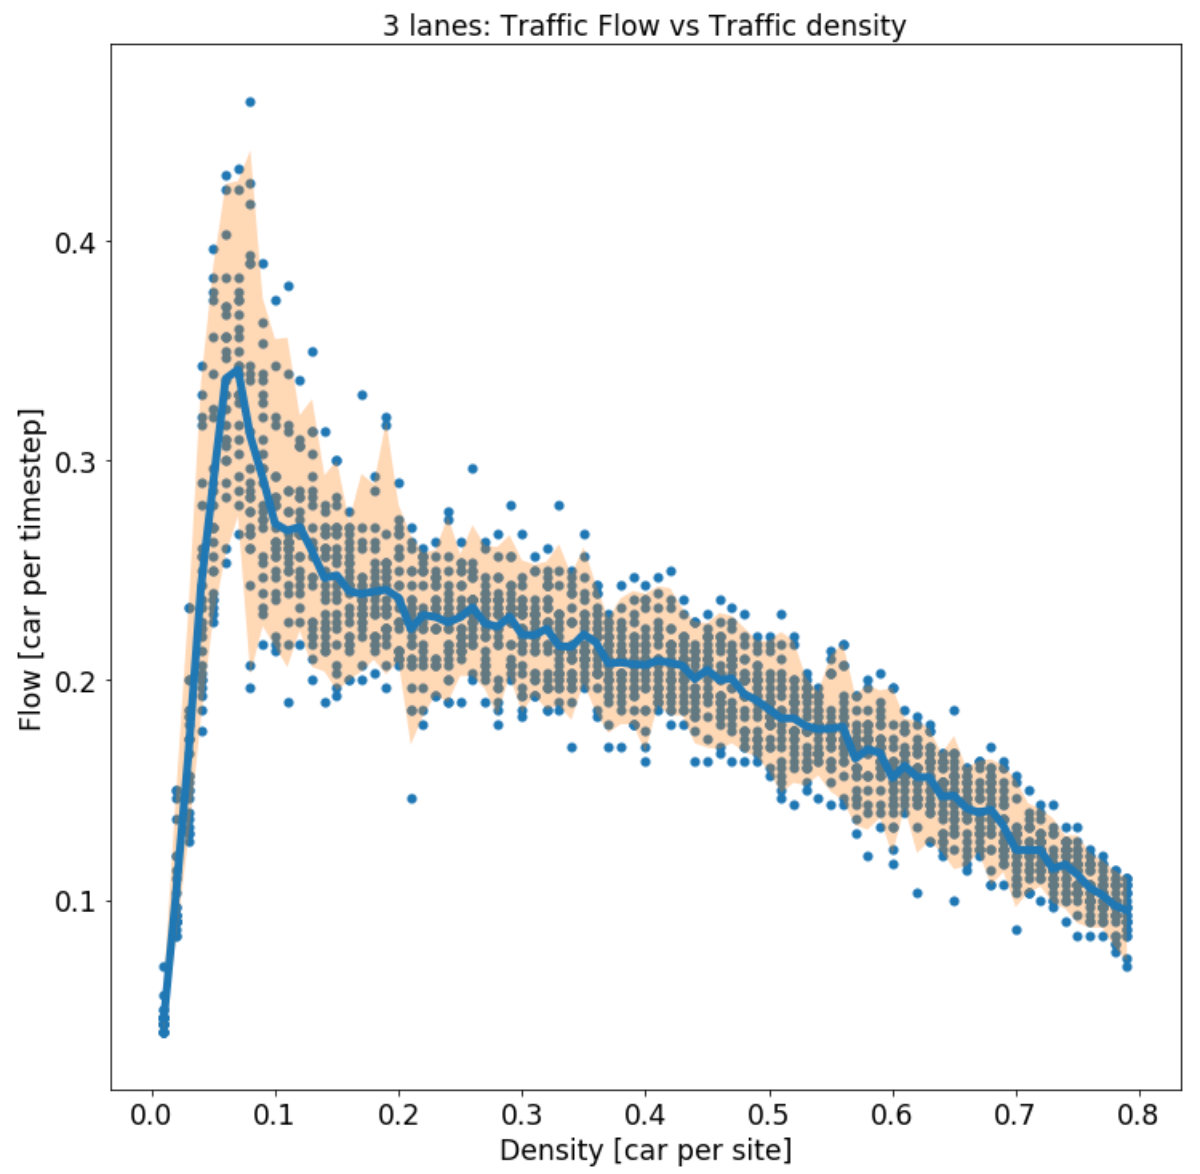


# Appendix: Code


In [218]:
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

class TrafficSimulation(object):
    
    def __init__(self, road_length, traffic_density, 
                 max_velocity, slowdown_proba, 
                 p_swap_lane = 1, n_lanes=2):
        
        assert type(max_velocity) is int, "Max_velocity must be an integer!"
        self.max_velocity = max_velocity
        
        assert type(road_length) is int, "Road length must be an integer!"
        self.road_length = road_length
        
        assert traffic_density >= 0 and traffic_density <=1, "Traffic density must be a proportion, 0<=x<=1"
        self.traffic_density = traffic_density
        
        assert slowdown_proba >= 0 and slowdown_proba <=1, "slowdown_proba must be a probability, 0<=x<=1"
        self.slowdown_proba = slowdown_proba
        
        assert p_swap_lane >= 0 and p_swap_lane <=1, "p_swap_lane must be a probability, 0<=x<=1"
        self.p_swap_lane = p_swap_lane
        
        assert type(n_lanes)==int, "Number of lanes must be an integer"
        self.n_lanes = n_lanes
        
        #Track number of cars that have passed the boundary
        self.flow = 0
        
        #Track number of timestep the simulation has been run
        self.time = 0
        
        #Number of cells to look back is equal to the maximum velocity
        self.look_back = max_velocity
        
        #Make road
        #Infer number of cars
        self.num_cars = np.round(road_length*traffic_density*n_lanes)
        num_cars = np.round(road_length*n_lanes*traffic_density)
        road_array = -np.ones((n_lanes, road_length), dtype=int)
        
        car_counter = 0
        #Insert the cars with 0 velocity at random positions on the road
        while car_counter < num_cars:
            random_loc = random.randrange(0, n_lanes), random.randrange(0, road_length)
            if road_array[random_loc] == -1:
                road_array[random_loc] = 0
                car_counter += 1
                
        self.road = road_array
        
    def look(self, lane, cell, ahead=True):
        '''
        Takes a current position, defined using lane and cell
        Returns distance to next car in direction ahead
        if ahead=False, returns distance to next car behind
        
        Distance is defined to be 0 if there is a car in same cell in other lane
        '''
        if self.road[lane, cell] != -1:
            return 0
            
        #1 if ahead
        if ahead:
            increment = 1
        else: 
            increment = -1
        
        #Keep looking one cell further out until a car is found
        #or far out enough has been checked for it not to matter
        #% operator accounts for periodic boundary condition
        distance = increment
        while self.road[lane, (cell + distance) % self.road_length] == -1 and abs(distance) < self.max_velocity+2:
            distance += increment
        
        return distance
    
    def check_lane(self, lane, cell, velocity):
        '''
        Checks if car, moved to road[lane, position] can:
        1) Accelerate
        2) Fit without obstructing car behind it
        3) Random draw from uniform distrubution on 0,1 < p_change
        '''
        
        #Look ahead, see if can accelerate
        front_distance = self.look(lane, cell)
        cond1 = front_distance-1 > velocity+1
        
        #Look back, see if there is space
        back_distance = self.look(lane, cell, ahead=False)
        #Back distance is negative, so we convert it to positive by *-1
        cond2 = (-1*back_distance)-1 > self.max_velocity
        
        cond3 = random.random() < self.p_swap_lane
        
        #Returns True iff all conditions are met
        return cond1*cond2*cond3
    
    def update_lanes(self):
        '''   
        Updates the lane of each of the cars on the road,
        Starting from the top lane and working downwards.
        Stores all updates on a copy of the road, then updates all synchronously.
        
        Swaps the lane of the car iff the following 4 conditions are met:
        
        
        1. The distance to the next car in front -1 < velocity of car +1.
        
        Conditions 2, 3, and 4 checked using check_lane(self, lane, cell, velocity):
        if in new lan car can:
            2) Accelerate
            3) Fit without obstructing car behind it
            4) Random draw from uniform distrubution on 0,1 < p_change
        
        Note: Does nothing if n_lanes = 1 as there are no lanes to switch to
        '''
        #If there is only one lane on the road, skip this step
        if self.n_lanes == 1:
            return
        
        #Make an empty road to store updates on
        next_state = -np.ones((self.n_lanes, self.road_length), dtype=int)
        for lane in range(self.n_lanes):
            #For every cell in lane
            for cell in range(self.road_length):    
                
                #if cell is not a car, go to next cell
                if self.road[lane, cell] != -1:
                    
                    #Current speed of car
                    current_velocity = self.road[lane, cell]

                    #Get distance to car in front
                    distance = 1  # The number of empty cells between this car and the next plus 1
                    while self.road[lane, ((cell + distance) % self.road_length)] == -1:
                        distance += 1

                    #Flag for whether the car will look for lane swap
                    attempt_lane_swap = (distance-1) < (current_velocity+1)
                    #print(attempt_lane_swap)
                    
                    #Try switching to lane above, else try lane down
                    if attempt_lane_swap:
                        

                        #If not already in the top lane, evaluate switching there
                        check_right = True
                        
                        if lane-1 >= 0:
                            if self.check_lane(lane-1, cell, current_velocity):
                                #print("I will can switch up")


                                #Swap possible to swap, swap with p=p_swap_lane
                                if random.random() <= self.p_swap_lane:
                                    next_state[lane-1, cell] = current_velocity
                                    check_right = False
                                
                                else:
                                    if not lane+1 <= self.n_lanes-1:
                                        next_state[lane, cell] = current_velocity
                            else:
                                if not lane+1 <= self.n_lanes-1:
                                    next_state[lane, cell] = current_velocity


                        #If not already in the bottom lane, evaluate switching there
                        #Same logic applies
                        if lane+1 <= self.n_lanes-1 and check_right:
                            if self.check_lane(lane+1, cell, current_velocity):

                                #Swap possible to swap, swap with p=p_swap_lane
                                if random.random() <= self.p_swap_lane:
                                    next_state[lane+1, cell] = current_velocity
                                else:
                                    next_state[lane, cell] = self.road[lane, cell]
                            else:
                                next_state[lane, cell] = self.road[lane, cell]
                        else:
                            next_state[lane, cell] = self.road[lane, cell]
                    else:
                        next_state[lane, cell] = self.road[lane, cell]

        
        #Update the lane of all cars simultaneously
        ##assert (self.road_length*self.n_lanes)-self.num_cars == np.count_nonzero(next_state==-1), "{}Cars dissapeared".format((self.road_length*self.n_lanes)-self.num_cars - np.count_nonzero(next_state==-1))
        self.road = next_state
    
    
    def update_velocities(self):
        ''''
        Updates velocity of each of the cars on the road. The following 3 steps are performed
        for each car. Then the state of each is updated synchronously.
        
        1. If the car is travelling at less than max velocity, increase speed by 1.
        
        2. If the distance, defined as the number of empty cells between two cars plus 1, 
        to the next car in front is smaller than or equal to the current velocity of the car, 
        decrease the velocity to the distance-1.
        
        3. If the current speed is not 0, with some fixed probability (slowdown_proba), 
        decrease the velocity by 1.
        '''
        
        for lane in range(self.n_lanes):
            #For every cell in lane
            for cell in range(self.road_length):
                
                #if cell is not a car, go to next cell
                if self.road[lane, cell] != -1:
                    

                    #Get distance to car in front
                    #distance = self.look(lane, cell
                    distance = 1  # The number of empty cells between this car and the next plus 1
                    while self.road[lane, ((cell + distance) % self.road_length)] == -1:
                        distance += 1

                    #Accelerate car by 1, if not already at max speed
                    if self.road[lane, cell] < self.max_velocity:
                        self.road[lane, cell] += 1

                    #Slow down due to other cars?
                    if self.road[lane, cell] >= distance:
                        self.road[lane, cell] = distance-1

                    #Random slowdown?
                    if random.random() <= self.slowdown_proba and  self.road[lane, cell]> 0:
                        self.road[lane, cell] -= 1
                    
        
    def step(self, track=False):
        '''
        Advances each car along its lane by its velocity
        
        Stores all updates on a copy of the road
        
        If track=True, every run increments self.time by 1 
        and whenever a car passes the periodic boundary, self.flow is incremented by 1
        '''
        if track:
            self.time += 1
        
        #Copy of the road, intialized to be empty
        #Will be filled successively
        next_state = -np.ones((self.n_lanes, self.road_length), dtype=int)
        #For every lane
        for lane in range(self.n_lanes):
            #For every cell in lane
            for cell in range(self.road_length):
                if self.road[lane, cell] != -1:
                    
                    #Check if car passes boundary
                    if track and (cell + self.road[lane, cell] > self.road_length-1):
                        self.flow += 1
                    
                    #next cell = current cell + current velocity, adjusting for periodic boundary
                    next_cell = (cell + self.road[lane, cell]) % self.road_length
                    next_state[lane, next_cell] = self.road[lane, cell]
                    
        self.road = next_state
                
    def display(self):
        '''
        returns a heatmap displaying the state of each cell on the road
        There are 5 possible states in the standard version of the simulation:
        White = -1, no car
        Red = Car w. velocity 0
        Orange = Car w. velocity 1
        Yellow = Car w. velocity 2
        Light Green = Car w. velocity 3
        Green = Car w. velocity 4
        Dark Green = Car w. velocity 5
        
        In general, the scale goes from red to green, with greener being faster.
        '''
        plt.figure(figsize=(10, 2.5+(2.55*self.n_lanes)))
        sns.heatmap(np.where(self.road==-1, np.nan, self.road),
                        square=True, cmap="RdYlGn", vmin=0, vmax=self.max_velocity,
                        cbar=False, xticklabels=False, yticklabels=False,
                        alpha=.75, linewidths=0.75, linecolor="black")
        
    def display_basic(self):
        print(''.join('.' if x == -1 else str(x) for x in self.road[0]))
        
    def run(self, steps, warmup=0, display=False, track=True):
        '''
        Runs warmup laps without visualizing the results to get cars up to speed
        Then visualizes steps of the simulation
        '''
        
        #Warmup: Run warmup times without displaying state
        for step in range(warmup):

            #Update lanes, velocities and step
            self.update_lanes()
            self.update_velocities()
            self.step() #not tracking

        #Run simulation for # steps, displaying state after each
        for step in range(steps):
                
            #Update and step
            self.update_lanes()
            self.update_velocities()
            
            #Display state
            if display:
                self.display()
                
            self.step(track=track)

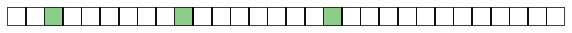

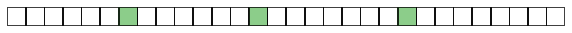

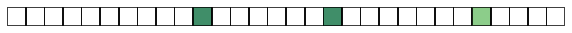

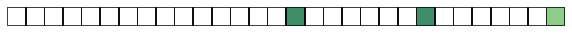

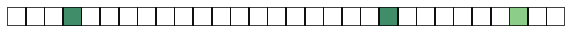

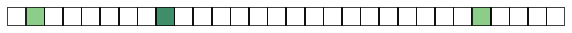

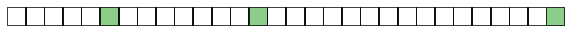

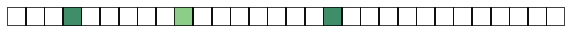

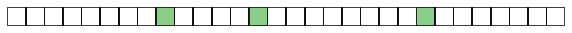

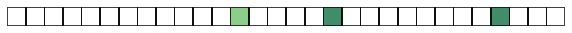

In [252]:
my_road=TrafficSimulation(30, 0.1, 5, 0.5, n_lanes=1)
my_road.run(10, 200, True)

In [170]:
def get_flow_data(simulations_per_density, steps_per_road, n_lanes=1):
    '''
    Makes simulations_per_density roads for each density 0.01 increment in the range 0.01 to 0.79,
    For each of these simulations, the road is run for 200 warmup steps.
    The flow/lane/timestep is then recorded for steps_per_road
    Note: n_lanes determines the number of lanes of the road. Constant for every simulation.
    
    Returns:
    
    flow_rate_list: format [[],[]] with densities in first list and flow/lane/timestep in second
    simulations_per_density entries are made in each list for for each density. Used to generate scatter plot.
    
    mean_flow: format [] with the average flow/lane/timestep across the simulations_per_density for each density

    lower_bound: format [] with the 2.5 percentile flow/lane/timestep 
    across the simulations_per_density for each density
    
    upper_bound = [] with the 97.5 percentile flow/lane/timestep 
    across the simulations_per_density for each density
    '''
    
    
    flow_rate_list = [[],[]] #for scatter plot
    mean_flow = [] #for plot
    lower_bound = [] 
    upper_bound = [] 
    
    density_list = [x/100 for x in range(1, 80, 1)]
    
    for density in density_list:
        #Intialize road with density
        temp_list = [] 

        for runs in range(simulations_per_density):
            #Run with 100 warmup, tracking post-warmup results
            my_road = TrafficSimulation(100, density, 5, 0.5, n_lanes=n_lanes)
            my_road.run(steps_per_road,200, False, True)
            
            
            #Store density and flow
            flow_rate_list[1].append((my_road.flow/my_road.n_lanes)/my_road.time)
            flow_rate_list[0].append(density)
            
            #Store a temp list to use for computing percentile stats
            temp_list.append((my_road.flow/my_road.n_lanes)/my_road.time)
            
        
        mean_flow.append(np.mean(temp_list))
        lower_bound.append(np.percentile(temp_list, 2.5))
        upper_bound.append(np.percentile(temp_list, 97.5))
    
    return flow_rate_list, mean_flow, upper_bound, lower_bound, density_list

In [104]:
def plot_flow(flow_rate_list, mean_flow, upper_bound, lower_bound, density_list, n_lanes):
    '''
    Generates one plot from the given data. 
    The plot contains:
    
    flow_rate_list: used to make scatter plot, with point given by each (flow, density) pair
    
    mean_flow: line plot with thick blue line, showing the average flow for each density
    
    upper_bound, lower_bound: used to create high-alpha fill between upper_bound and lower_bound for each
    density. This serves to visualize the 95% confidence interval of the flow for each density.
    '''
    
    
    plt.figure(figsize=(12, 12))
    params = {'legend.fontsize': 'x-large',
              'figure.figsize': (15, 5),
             'axes.labelsize': 'xx-large',
             'axes.titlesize':'xx-large',
             'xtick.labelsize':'xx-large',
             'ytick.labelsize':'xx-large'}
    plt.rcParams.update(params)
    
    
    plt.scatter(flow_rate_list[0], flow_rate_list[1], linewidth=0.1)
    plt.plot(density_list, mean_flow, linewidth=5)
    plt.fill_between(density_list, upper_bound, lower_bound, alpha=0.3)
    plt.title("%s: Traffic Flow vs Traffic density"%n_lanes)
    plt.xlabel("Density [car per site]")
    plt.ylabel("Flow [car per timestep]")
    
    plt.show()

In [236]:
flow_rate_list1, mean_flow1, upper_bound1, lower_bound1, density_list1 = \
        get_flow_data(25, 100, n_lanes=1)

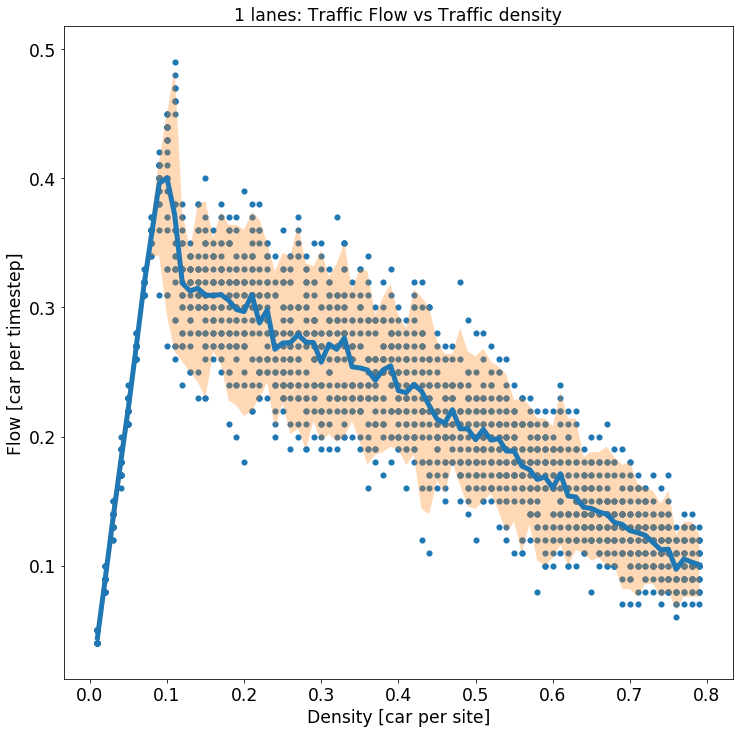

In [238]:
plot_flow(flow_rate_list1, mean_flow1, upper_bound1, lower_bound1, density_list1, "1 lanes")

In [234]:
flow_rate_list2, mean_flow2, upper_bound2, lower_bound2, density_list2 = \
        get_flow_data(25, 100, n_lanes=2)

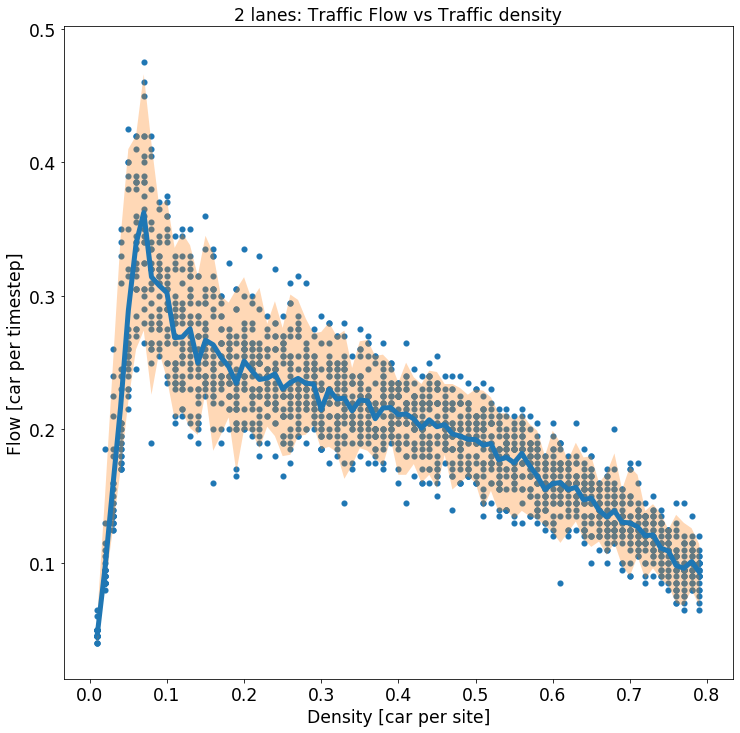

In [228]:
plot_flow(flow_rate_list2, mean_flow2, upper_bound2, lower_bound2, density_list2, "2 lanes")

In [230]:
flow_rate_list3, mean_flow3, upper_bound3, lower_bound3, density_list3 = \
        get_flow_data(25, 100, n_lanes=3)

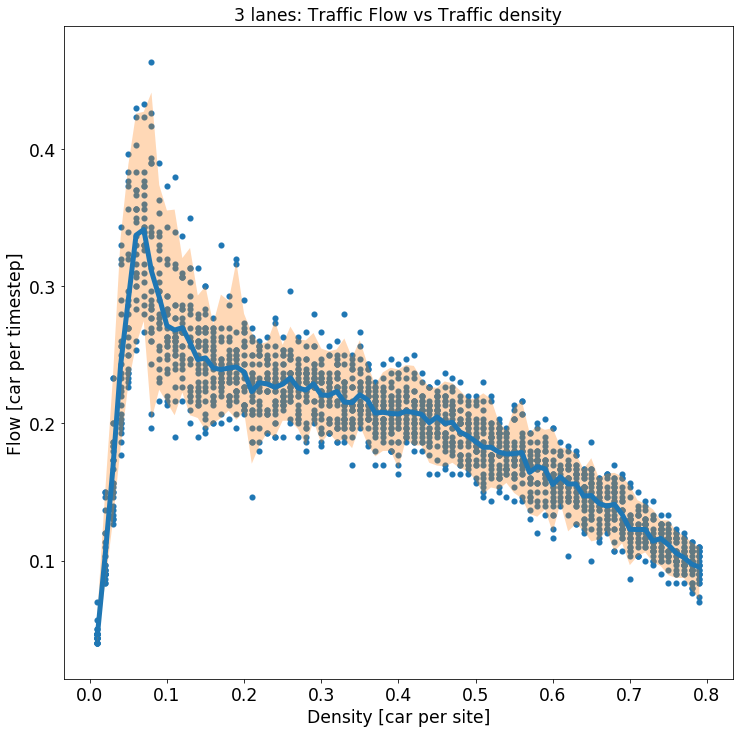

In [233]:
plot_flow(flow_rate_list3, mean_flow3, upper_bound3, lower_bound3, density_list3, "3 lanes")